In [251]:
from sklearn.datasets import load_breast_cancer


bc=load_breast_cancer()

In [252]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

dataset info

In [253]:
bc.target[500]

np.int64(1)

In [254]:
bc.target.shape

(569,)

In [255]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [256]:
bc.data.shape

(569, 30)

preprocessing

In [257]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=0.2)

In [258]:
print(f"feature=>train:{x_train.shape} - test : {x_test.shape}")

print(f"lebal=>train:{y_train.shape}-tesy:{y_test.shape}")

feature=>train:(455, 30) - test : (114, 30)
lebal=>train:(455,)-tesy:(114,)


Normalaiz

In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [260]:
x_train[0]

array([0.33052549, 0.16608997, 0.32757149, 0.20153609, 0.42493455,
       0.24431606, 0.19885192, 0.2749503 , 0.29738388, 0.22851727,
       0.04574784, 0.08341993, 0.06358741, 0.02689214, 0.18471573,
       0.15075384, 0.07863636, 0.28281872, 0.06656232, 0.05642386,
       0.26211534, 0.19865047, 0.27507498, 0.13480052, 0.41044624,
       0.23887417, 0.24784345, 0.54948454, 0.20901804, 0.14174056])

Classification


1.Naive bayes

In [261]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def calculate(y_train,y_test,y_pred_train,y_pred_test):

    acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)


    p=precision_score(y_true=y_test,y_pred=y_pred_test)
    r=recall_score(y_true=y_test,y_pred=y_pred_test)

    print(f"accuracy_train:{acc_train},accuracy_test:{acc_test},precision:{p},recall:{r}")

    return acc_train,acc_test,p,r

In [262]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train,y_train)

GaussianNB()

In [263]:
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:0.9406593406593406,accuracy_test:0.9298245614035088,precision:0.96,recall:0.935064935064935


2.KNN


In [264]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8,algorithm="kd_tree",leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [265]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:0.9736263736263736,accuracy_test:0.9824561403508771,precision:0.987012987012987,recall:0.987012987012987


3.decision tree

In [266]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=64,min_samples_split=4,criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=64, min_samples_split=4)

In [267]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)

acc_train_dt,acc_test_dt,p_dt,r_dt=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:1.0,accuracy_test:0.9473684210526315,precision:0.9733333333333334,recall:0.948051948051948


4.Random Forest

In [268]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500,max_depth=64,min_samples_split=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [269]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:0.9934065934065934,accuracy_test:0.9473684210526315,precision:0.9733333333333334,recall:0.948051948051948


5.SVM

In [270]:
from sklearn.svm import SVC

svm=SVC(kernel="poly")
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [271]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:0.9824175824175824,accuracy_test:0.9649122807017544,precision:0.9620253164556962,recall:0.987012987012987


6.Logistic Regression


In [272]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [273]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

acc_train_lr,acc_test_lr,p_lr,r_lr=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:0.9736263736263736,accuracy_test:0.9649122807017544,precision:0.9620253164556962,recall:0.987012987012987


7.ANN

In [274]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier(hidden_layer_sizes=256,activation="relu",solver="adam",batch_size=64)

ann.fit(x_train,y_train)

c:\Users\aa\Desktop\ML\lerning_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [275]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann=calculate(y_train,y_test,y_pred_train,y_pred_test)

accuracy_train:0.9868131868131869,accuracy_test:0.9736842105263158,precision:0.9743589743589743,recall:0.987012987012987


Comparison   # مقایسه

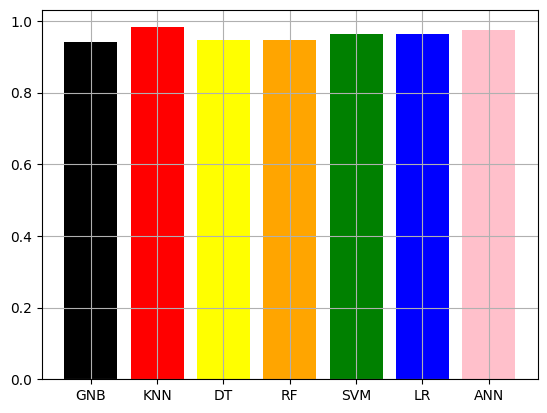

In [276]:
import matplotlib.pyplot as plt
acc_train=[acc_train_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]


title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["black","red","yellow","orange","green","blue","pink"]


plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()





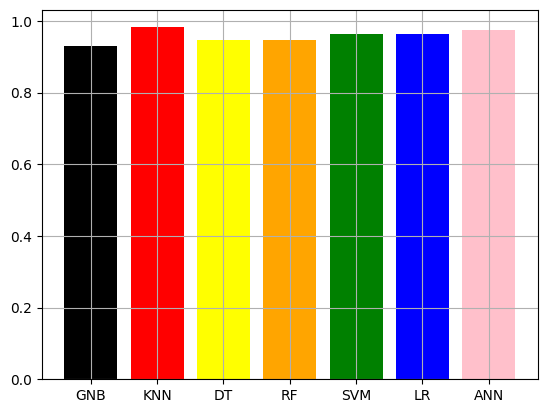

In [277]:
acc_test=[acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]

title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["black","red","yellow","orange","green","blue","pink"]

plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

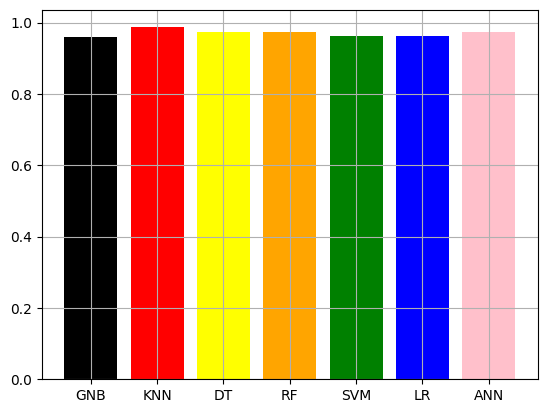

In [278]:
p=[p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]

title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["black","red","yellow","orange","green","blue","pink"]

plt.bar(title,p,color=colors)
plt.grid()
plt.show()

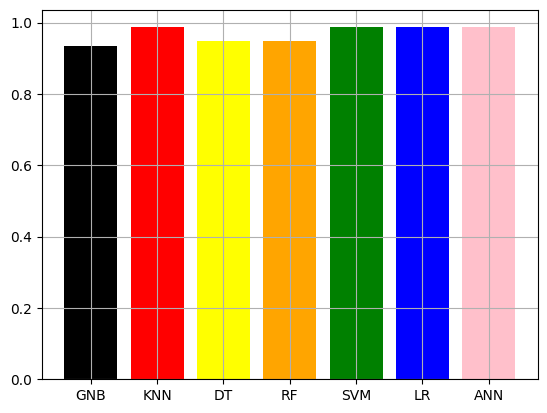

In [279]:
r=[r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]

title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["black","red","yellow","orange","green","blue","pink"]

plt.bar(title,r,color=colors)
plt.grid()
plt.show()